In [ ]:
# importin liraries 
from sklearn import svm 
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE 
from sklearn.preprocessing import MinMaxScaler
import warnings
from  collections import Counter 
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt 
from keras import Sequential
from keras.layers import Dense

# __1.Preprocessing__

### __1.1 Missing values__

In [ ]:
#dealing with the dataset 
df = pd.read_csv('train.csv')
df = df.dropna() 
df.isna().any()
df = df.drop('Loan_ID',axis = 1 )
df["LoanAmount"] =(df['LoanAmount']*1000).astype(int)

#the counter allows us to count the values within a field

Counter({'N': 148, 'Y': 332})

In [ ]:
#We calculated the size percentage of the Yes in the dataset  
Counter(df["Loan_Status"])['Y']/df['Loan_Status'].size

0.6916666666666667

### __1.2 Encode values__

In [ ]:
#tartget values
pre_y = df["Loan_Status"]
dm_y = pre_y.map(dict(Y=1, N=0))

#features 
pre_X = df.drop("Loan_Status", axis = 1)
dm_X = pd.get_dummies(pre_X)

### __1.3 Smote Analysis__

using smote will allow us to balance the output of the dataset 

In [ ]:
#smote object 
smote = SMOTE(ratio= 'minority')
X1, y = smote.fit_sample(dm_X, dm_y)

#showing the results of the balanced data
Counter(y)

Counter({0: 332, 1: 332})

### __1.4 Scaling__

In [ ]:
#scaler object 
sc = MinMaxScaler()
X = sc.fit_transform(X1)

# __2. Building the model__

In [ ]:
#train test split 
X_train, X_test ,  y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle =True)

#model 
classifiier = Sequential()
classifiier.add(Dense(400, activation='relu', kernel_initializer='random_normal', input_dim = X_test.shape[1]))
classifiier.add(Dense(800,activation='relu',kernel_initializer='random_normal'))
classifiier.add(Dense(10, activation='relu', kernel_initializer='random_normal'))
classifiier.add(Dense(1, activation= 'sigmoid', kernel_initializer='random_normal'))
classifiier.compile(optimizer='adam', loss='binary_crossentropy',metrics= ['accuracy'])
classifiier.fit(X_train,y_train, batch_size=25, epochs= 100,verbose = 0)
eval_model = classifiier.evaluate(X_train, y_train)
eval_model


17/17 [==============================] - 0s 2ms/step - loss: 0.1732 - accuracy: 0.9303


[0.17322678864002228, 0.930320143699646]

In [ ]:
 #adding a limiter 
 y_pred = classifiier.predict(X_test)
 y_pred = (y_pred>0.55)

 #this will allow us output any predicted value that is over 0.5 as 1 and anything less than 0.5 as zero
 #sometimes we just need to play around with this value 

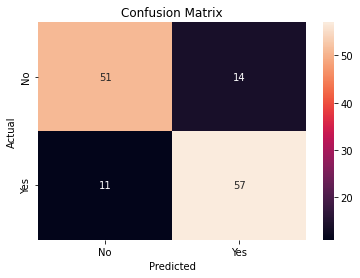

In [ ]:
#evaluating the model 
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
ax = plt.subplot()
sns.heatmap(cm,annot = True, ax=ax );

#labels, title and ticks
ax.set_xlabel('Predicted');ax.set_ylabel('Actual');
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(['No','Yes']);ax.yaxis.set_ticklabels(['No','Yes']);